In [23]:
from multivariable import *

In [ ]:
class bracket_operator_penalty:
    def __init__(self, d, f, g, h, l, u):
        self.d = d  # Number of variables
        self.f = f  # Objective Function
        self.g = g  # Nonlinear Constraints
        self.h = h  # linear Constrants
        self.l = l  # lower limit of x
        self.u = u  # upper limit of x
        self.it_vs_x = []
        self.feval = []

    def plot_it_vs_feval(self):
        title = "Iteration vs Function Evaluations"
        xlabel = "Iteration"
        ylabel = "Function Evaluations"
        history = np.array(self.feval, dtype=object)

        iterations = range(1, len(self.feval) + 1)

        plt.figure(figsize=(6, 4))
        plt.plot(iterations, self.feval, marker="o", linestyle="-", color="b")
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.xticks(iterations)
        plt.show()

    def plot_it_vs_x(self):
        title = "Iteration vs Objective Function Value"
        xlabel = "Iteration"
        ylabel = "Objective Function Value"
        history = np.array(self.it_vs_x, dtype=object)

        iterations = [item[0] for item in history]
        x_vectors = np.array([item[1] for item in history])

        function_values = np.array([self.f(x) for x in x_vectors])

        plt.figure(figsize=(6, 4))
        plt.plot(iterations, function_values, marker="o", linestyle="-", color="b")
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.xticks(iterations)
        plt.show()

    def surface_plot(self):

        x1 = np.linspace(self.l[0], self.u[0], 500)
        x2 = np.linspace(self.l[1], self.u[1], 500)
        X1, X2 = np.meshgrid(x1, x2)

        Z = np.array(
            [self.f(np.array([x1, x2])) for x1, x2 in zip(X1.ravel(), X2.ravel())]
        ).reshape(X1.shape)

        G = np.array(
            [self.g(np.array([x1, x2])) for x1, x2 in zip(X1.ravel(), X2.ravel())]
        )
        G = G.reshape(X1.shape + (len(G[0]),))

        feasible_region = np.all(G >= 0, axis=2)

        plt.figure(figsize=(8, 8))
        contour = plt.contour(
            X1,
            X2,
            Z,
            cmap="viridis",
        )
        plt.clabel(contour, inline=True, fontsize=8)
        plt.colorbar(contour, label="Objective function value")

        plt.contourf(X1, X2, feasible_region, levels=[0.5, 1], colors="red", alpha=0.5)
        plt.plot([], [], color="red", label="Feasible Region")

        history = self.it_vs_x
        trajectory = np.array([item[1] for item in history])
        for i in range(len(trajectory) - 1):
            plt.annotate(
                "",
                xy=trajectory[i + 1],
                xytext=trajectory[i],
                arrowprops=dict(arrowstyle="->", color="black", lw=1.5),
            )

        starting_point = trajectory[0]
        plt.scatter(
            starting_point[0],
            starting_point[1],
            color="blue",
            s=10,
            label="Starting Point",
        )

        min_x1, max_x1 = np.min(trajectory[:, 0]), np.max(trajectory[:, 0])
        min_y1, max_y1 = np.min(trajectory[:, 1]), np.max(trajectory[:, 1])

        padding_x = 0.05 * (max_x1 - min_x1)
        padding_y = 0.05 * (max_y1 - min_y1)
        plt.xlim(self.l[0] - padding_x, self.u[0] + padding_x)
        plt.ylim(self.l[1] - padding_y, self.u[1] + padding_y)

        plt.xlabel("$x_1$")
        plt.ylabel("$x_2$")
        plt.title("Contour plot with feasible region and trajectory")
        plt.legend()
        plt.grid(True)
        plt.show()

    def __call__(self):
        eps1 = 10**-6
        eps2 = 10**-6
        r = 0.1
        c = 1.2
        k = 1
        M = 19 / math.log10(c)

        x = np.random.uniform(self.l, self.u)
        self.it_vs_x.append((k, x))
        print(f"initial guess {x}")

        while k <= M:

            penalty_fun = lambda x, R=r: self.f(x) + R * np.sum(
                np.array([min(gx, 0.0) for gx in self.g(x)]) ** 2
            )

            optimizer = Multi_variable_optimizer(
                penalty_fun, 1000, self.l, self.u, self.d, eps1
            )

            x_next = optimizer.Conjugate_Gradient_Method(x)
            pf_x_next = penalty_fun(x_next)
            self.it_vs_x.append((k, x_next))

            if k > 1:
                print(
                    f"#it: {k} | R: {float(r):.2e} | X: {[f'{xi:.2e}' for xi in x_next]} | error: {abs(pf_x_next - pf_x):.2e}"
                )
                if abs(pf_x_next - pf_x) <= eps2:
                    return x_next, k , self.feval

            r *= c
            x = x_next
            pf_x = pf_x_next
            self.feval.append(1 + optimizer.fun_evals)
            k += 1

        return x, k - 1, self.feval

In [25]:
def problem(value):
    d1 = 2

    l1 = np.array([13, 0])
    u1 = np.array([20, 4])

    f1 = lambda x: np.sum((x - [10, 20]) ** 3)

    def g1(x):
        g11 = lambda x: (x[0] - 5) ** 2 + (x[1] - 5) ** 2 - 100

        g12 = lambda x: -1 * ((x[0] - 6) ** 2 + (x[1] - 5) ** 2 - 82.81)

        g1f = np.array([g11(x), g12(x)])

        return g1f

    def h1(x):
        return [0]  # As there is no linear constraints in problem1

    d2 = 2

    f2 = (
        lambda x: -1
        * (math.sin(2 * math.pi * x[0]) ** 3 * math.sin(2 * math.pi * x[1]))
        / (x[0] ** 3 * (x[0] + x[1]))
    )

    def g2(x):
        g21 = lambda x: -1 * (x[0] ** 2 - x[1] + 1)

        g22 = lambda x: -1 * (1 - x[0] + (x[1] - 4) ** 2)

        g2f = np.array([g21(x), g22(x)])

        return g2f

    def h2(x):
        return [0]  # As there is no linear constraints in problem2

    l2 = np.array([0.0001, 0.0001])
    u2 = np.array([10, 10])

    d3 = 8

    f3 = lambda x: np.sum(x[0:3])

    def g3(x):
        g31 = lambda x: -1 * (-1 + 0.0025 * (x[3] + x[5]))

        g32 = lambda x: -1 * (-1 + 0.0025 * (-1 * x[3] + x[4] + x[6]))

        g33 = lambda x: -1 * (-1 + 0.01 * (-1 * x[5] + x[7]))

        g34 = lambda x: -1 * (100 * x[0] - x[0] * x[5] + 833.33252 * x[3] - 83333.333)

        g35 = lambda x: -1 * (x[1] * x[3] - x[1] * x[6] - 1250 * x[3] + 1250 * x[4])

        g36 = lambda x: -1 * (x[2] * x[4] - x[2] * x[7] - 2500 * x[4] + 1250000)

        g3f = np.array([g31(x), g32(x), g33(x), g34(x), g35(x), g36(x)])

        return g3f

    def h3(x):
        return [0]  # As there is no linear constraints in problem3

    l3 = np.array([100, 1000, 1000, 10, 10, 10, 10, 10])
    u3 = np.array([10000, 10000, 10000, 1000, 1000, 1000, 1000, 1000])

    match value:
        case 1:
            return d1, f1, g1, h1, l1, u1
        case 2:
            return d2, f2, g2, h2, l2, u2
        case 3:
            return d3, f3, g3, h3, l3, u3

initial guess [14.03241719  2.45290253]
#it: 2 | R: 1.00e+00 | X: ['1.40e+01', '6.86e-07'] | error: 3.77e+01
#it: 3 | R: 1.00e+01 | X: ['1.36e+01', '9.05e-07'] | error: 5.34e+01
#it: 4 | R: 1.00e+02 | X: ['1.36e+01', '2.32e-07'] | error: 4.34e+01
#it: 5 | R: 1.00e+03 | X: ['1.36e+01', '4.02e-07'] | error: 3.81e+02
#it: 6 | R: 1.00e+04 | X: ['1.37e+01', '-3.07e-07'] | error: 8.34e+03
#it: 7 | R: 1.00e+05 | X: ['1.37e+01', '-4.18e-07'] | error: 7.89e+04
#it: 8 | R: 1.00e+06 | X: ['1.49e+01', '3.97e+00'] | error: 8.38e+04
#it: 9 | R: 1.00e+07 | X: ['1.49e+01', '3.97e+00'] | error: 7.02e-04
#it: 10 | R: 1.00e+08 | X: ['1.49e+01', '3.97e+00'] | error: 2.43e-03
#it: 11 | R: 1.00e+09 | X: ['1.49e+01', '3.97e+00'] | error: 1.18e-02
#it: 12 | R: 1.00e+10 | X: ['1.49e+01', '3.97e+00'] | error: 5.70e-02
#it: 13 | R: 1.00e+11 | X: ['1.49e+01', '3.97e+00'] | error: 9.60e-01
#it: 14 | R: 1.00e+12 | X: ['1.49e+01', '3.97e+00'] | error: 4.18e+01
#it: 15 | R: 1.00e+13 | X: ['1.49e+01', '3.97e+00'] | er

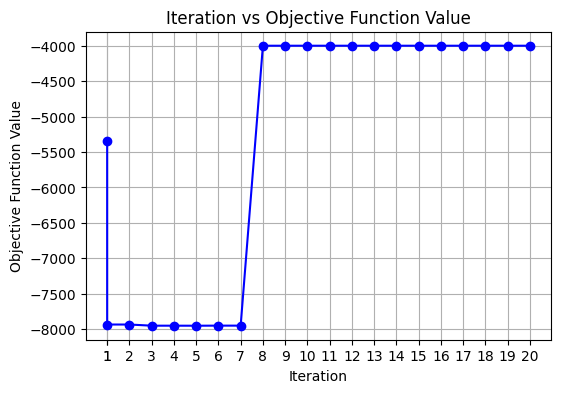

In [21]:
def main():
    problem_id = int(input("enter function id: "))

    d, f, g, h, l, u = problem(problem_id)

    optimizer = bracket_operator_penalty(d, f, g, h, l, u)

    optimal_x, iterations,feval = optimizer()
    total_feval = np.sum(feval)
    print("-" * 100)
    print(f"range of x {l} to {u}")
    print("Number of Iterations", iterations)
    print("Optimal X ", optimal_x)
    print(f"Objective Function Value at Optimal X {f(optimal_x)}")
    print(f"Optimal X is Feasible? {np.all(g(optimal_x)>=0)}")
    print("function Evaluations ", total_feval)
    optimizer.plot_it_vs_x()
    if d == 2:
        optimizer.surface_plot()
    optimizer.plot_it_vs_feval()


# 1. 14.09500000000000064, 0.8429607892154795668 --> -6961.81387558015 ok
# 2. 1.227, 4.245 --> 0.09581940945335318 ok
# 3. 579.3167, 1359.943, 5110.071, 182.0174, 295.5985, 217.9799, 286.4162, 395.5979 --> 7049.3307

if __name__ == "__main__":
    main()